# QTM 151 - Quiz 5

### Please try to submit the quiz as an HTML file

<font size = "5">
Print your name below

In [1]:
# Write your answer here
print("Zihan Liang")

Zihan Liang


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Write the following message as a comment: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your own code
print("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries `matplotlib.pyplot` and `pandas`

In [3]:
# Write your answer here
import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

In this quiz, we will work with a World Bank dataset on the proportion of urban population across countries, from 2016-2020.

- This is an example of a "panel"/"longitudinal" dataset which contains information about the same unit (country) over time.
- This is in "long" format (see Lectures 21 and 23)


<font size = "5">

(a) Import and parse dates

- Import `data_raw/wdi_long.csv`
- Create a new column called `date` which uses ```pd.to_datetime(...,format = ...)``` to convert year to a date format.
- To get full points, use wild cards to establish the format.


In [4]:
# Write your own code
data = pd.read_csv('data_raw/wdi_long.csv')
data['date'] = pd.to_datetime(data['year'], format='%Y')

<font size = "5">

(b) Sort time series

- Sort ```wdi_long``` by ```country_name``` and ```year``` in ascending order. Call this new dataset, ```wdi_sorted```

HINT: See Lecture 10a for how to sort. You can sort by multiple variables by entering them as a list ```[[...]]``` 

NOTE: Sorting is very important when using time series data, particularly for plotting and data cleaning, since observations are ordered in sequence from earliest to latest.



In [5]:
# Write your own code
wdi_sorted = data.sort_values(by=['country_name', 'year'])

<font size = "5">

(c) Flag subset of data and plot

- For the sorted dataset, subset all entries of ```wdi_sorted``` from part (b) where ```country_name``` to equal ```"United States"``` using ```.query()```. Call this new dataset ```wdi_usa```
- Create a line plot with year on the x-axis and ```prop_urban``` on the y-axis
- Label the x-axis, the y-axis, and the title

HINT: You can use ```.query()``` to subset to "United States" by using escape characters, e.g. ``` country_name == \"United States\" ```. See Lecture 11 for how to use query.

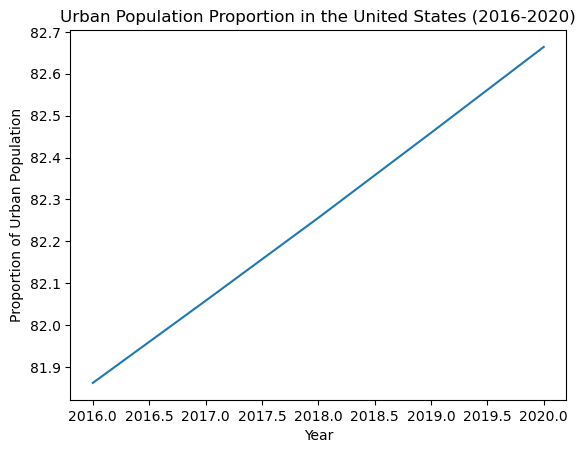

In [6]:
# Write your own code
wdi_usa = wdi_sorted.query('country_name == "United States"')

plt.plot(wdi_usa['year'], wdi_usa['prop_urban'])

plt.xlabel('Year')
plt.ylabel('Proportion of Urban Population')
plt.title('Urban Population Proportion in the United States (2016-2020)')

plt.show()

<font size = "5">

(d) Obtain yearly growth rates by country

- For this question you will use ```wdi_sorted``` that you created in part (b)
- Use ```.groupby()```, ```.diff()```, and ```.shift()``` to compute the yearly growth rates in the urban population by country. 
- Store your results in a new column of ```wdi_sorted``` called ``` growth_prop_urban```. 

HINT: See Lectures 21 and 23.


In [8]:
# Write your own code
wdi_sorted['growth_prop_urban'] = wdi_sorted.groupby('country_name')['prop_urban'].transform(lambda x: x.diff() / x.shift())

<font size = "5">

(e) Obtain average yearly growth rates

- This question follows-up to part (d).
- Use ```.groupby()```, ```.agg()``` to compute the average of ```growth_prop_urban```

HINT: See Lecture 14 for how to compute grouped statistics. 


In [9]:
# Write your own code
average_growth_rates = wdi_sorted.groupby('country_name')['growth_prop_urban'].agg('mean')

<font size = "5">

(f) Convert dataset to wide format

- Convert `wdi_sorted` from long to wide, using the following arguments: <br>
```
   index = 'country_name'
   columns = 'year'
   values =  'prop_urban'
```
- Display the dataset to check that it is in wide format

HINT: See Lecture 23 for details on how to use ```pd.pivot()```

In [ ]:
# Write your own code
wdi_wide = wdi_sorted.pivot(index='country_name', columns='year', values='prop_urban')
print(wdi_wide)

year                     2016    2017    2018    2019    2020
country_name                                                 
Afghanistan            25.020  25.250  25.495  25.754  26.026
Albania                58.421  59.383  60.319  61.229  62.112
Algeria                71.459  72.052  72.629  73.189  73.733
American Samoa         87.198  87.170  87.153  87.147  87.153
Andorra                88.248  88.150  88.062  87.984  87.916
...                       ...     ...     ...     ...     ...
Virgin Islands (U.S.)  95.480  95.603  95.721  95.832  95.939
West Bank and Gaza     75.628  75.894  76.164  76.440  76.719
Yemen, Rep.            35.394  36.016  36.642  37.273  37.908
Zambia                 42.438  42.976  43.521  44.072  44.629
Zimbabwe               32.296  32.237  32.209  32.210  32.242

[217 rows x 5 columns]
